In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
from millify import millify

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [70]:
dataframe = pd.read_csv(r"covid19_tweets.csv")
dataframe.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [65]:
dataframe.dtypes

user_name                   object
user_location               object
user_description            object
user_created                object
user_followers               int64
user_friends                 int64
user_favourites              int64
user_verified                 bool
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
is_retweet                    bool
tweet_count                  int64
dtype: object

In [64]:
def text_cleaner(text):
    text = re.sub(r"\n", " ", str(text))
    text = re.sub(r"\t", " ", str(text))
    text = re.sub(r"\r", " ", str(text))
    text = re.sub(r"(@)|(#)|(RT[\s]+)|(https?:\/\/\S+)|([^a-zA-Z0-9 -])", "", str(text))
    text = text.strip(" ")
    return text

In [21]:
def wordClouder(string_column, name):
    Words = ''.join([words for words in string_column])
    wordcloud = WordCloud(width=1000, height = 600, random_state = 10, background_color="white", max_words=200)
    wordcloud.generate(Words)
    plt.style.use('fivethirtyeight')
    plt.figure(figsize = (20,28))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    wordcloud.to_file(name)
    plt.show()

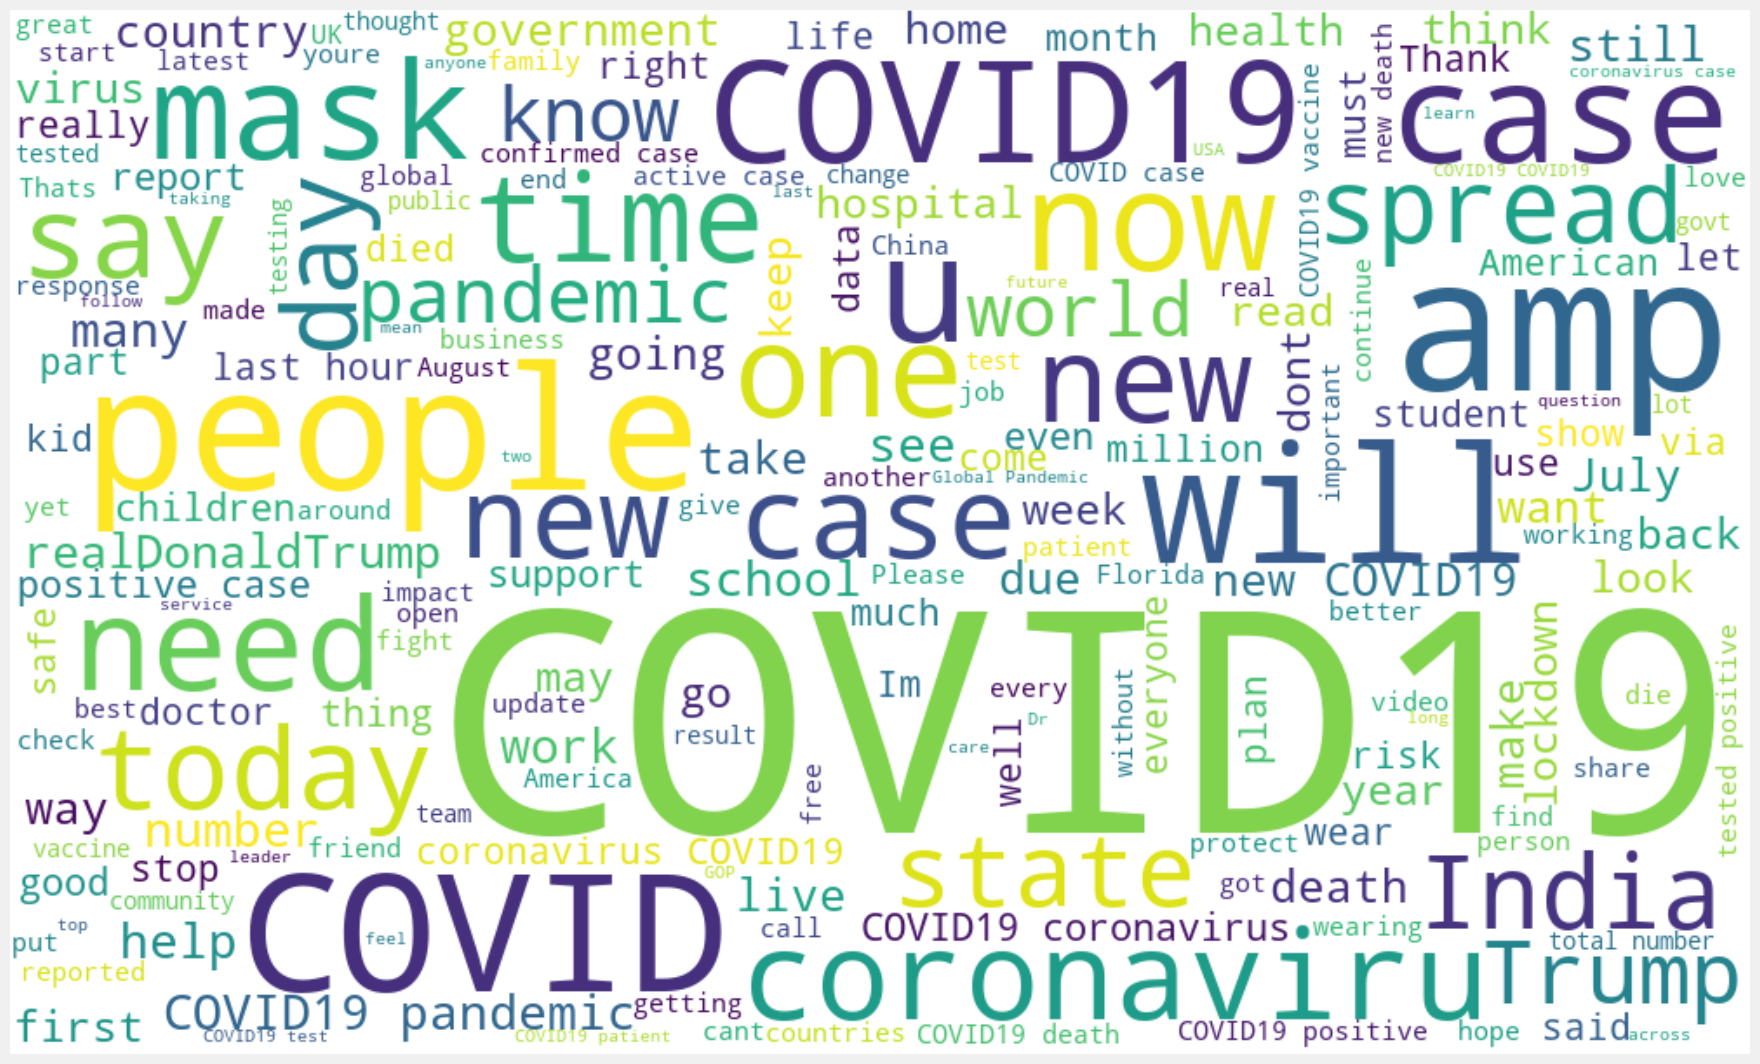

In [22]:
dataframe['text'] = dataframe['text'].apply(text_cleaner)
wordClouder(dataframe['text'], "tweets.png")

C:\Users\ZERO3\AppData\Local\Temp\ipykernel_83860\2344081455.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='date'>

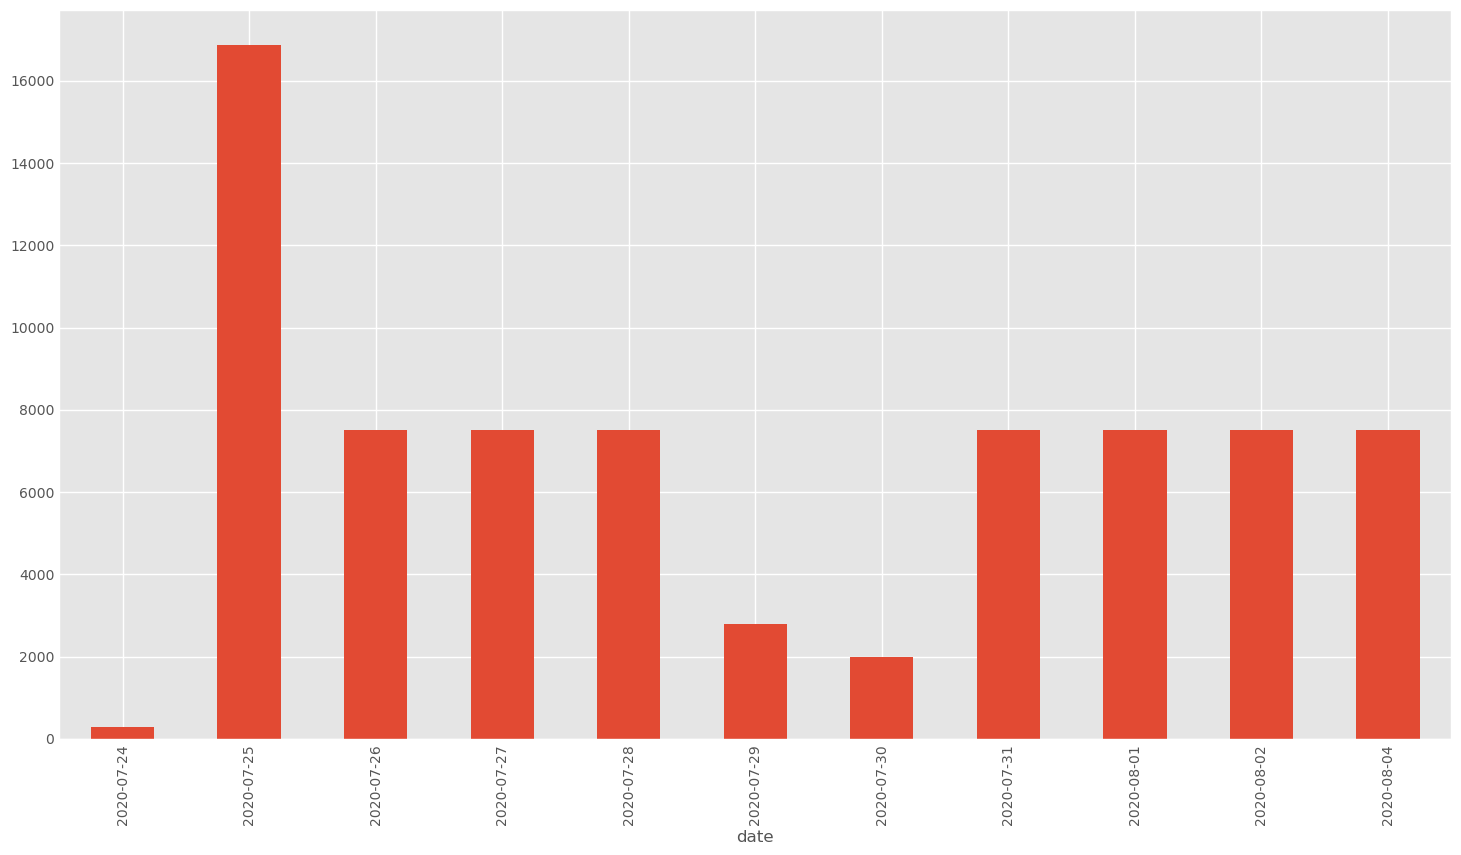

In [101]:
dataframe["tweet_count"] = 1

dataframe["date"] = pd.to_datetime(dataframe["date"])
tweets_por_dia = dataframe.groupby(dataframe['date'].dt.to_period('d')).sum()

tweets_por_dia['tweet_count'].plot(kind = 'bar')


C:\Users\ZERO3\AppData\Local\Temp\ipykernel_83860\1326885416.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ZERO3\anaconda3\envs\ArteDeLaAnalitica\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.

C:\Users\ZERO3\anaconda3\envs\ArteDeLaAnalitica\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.



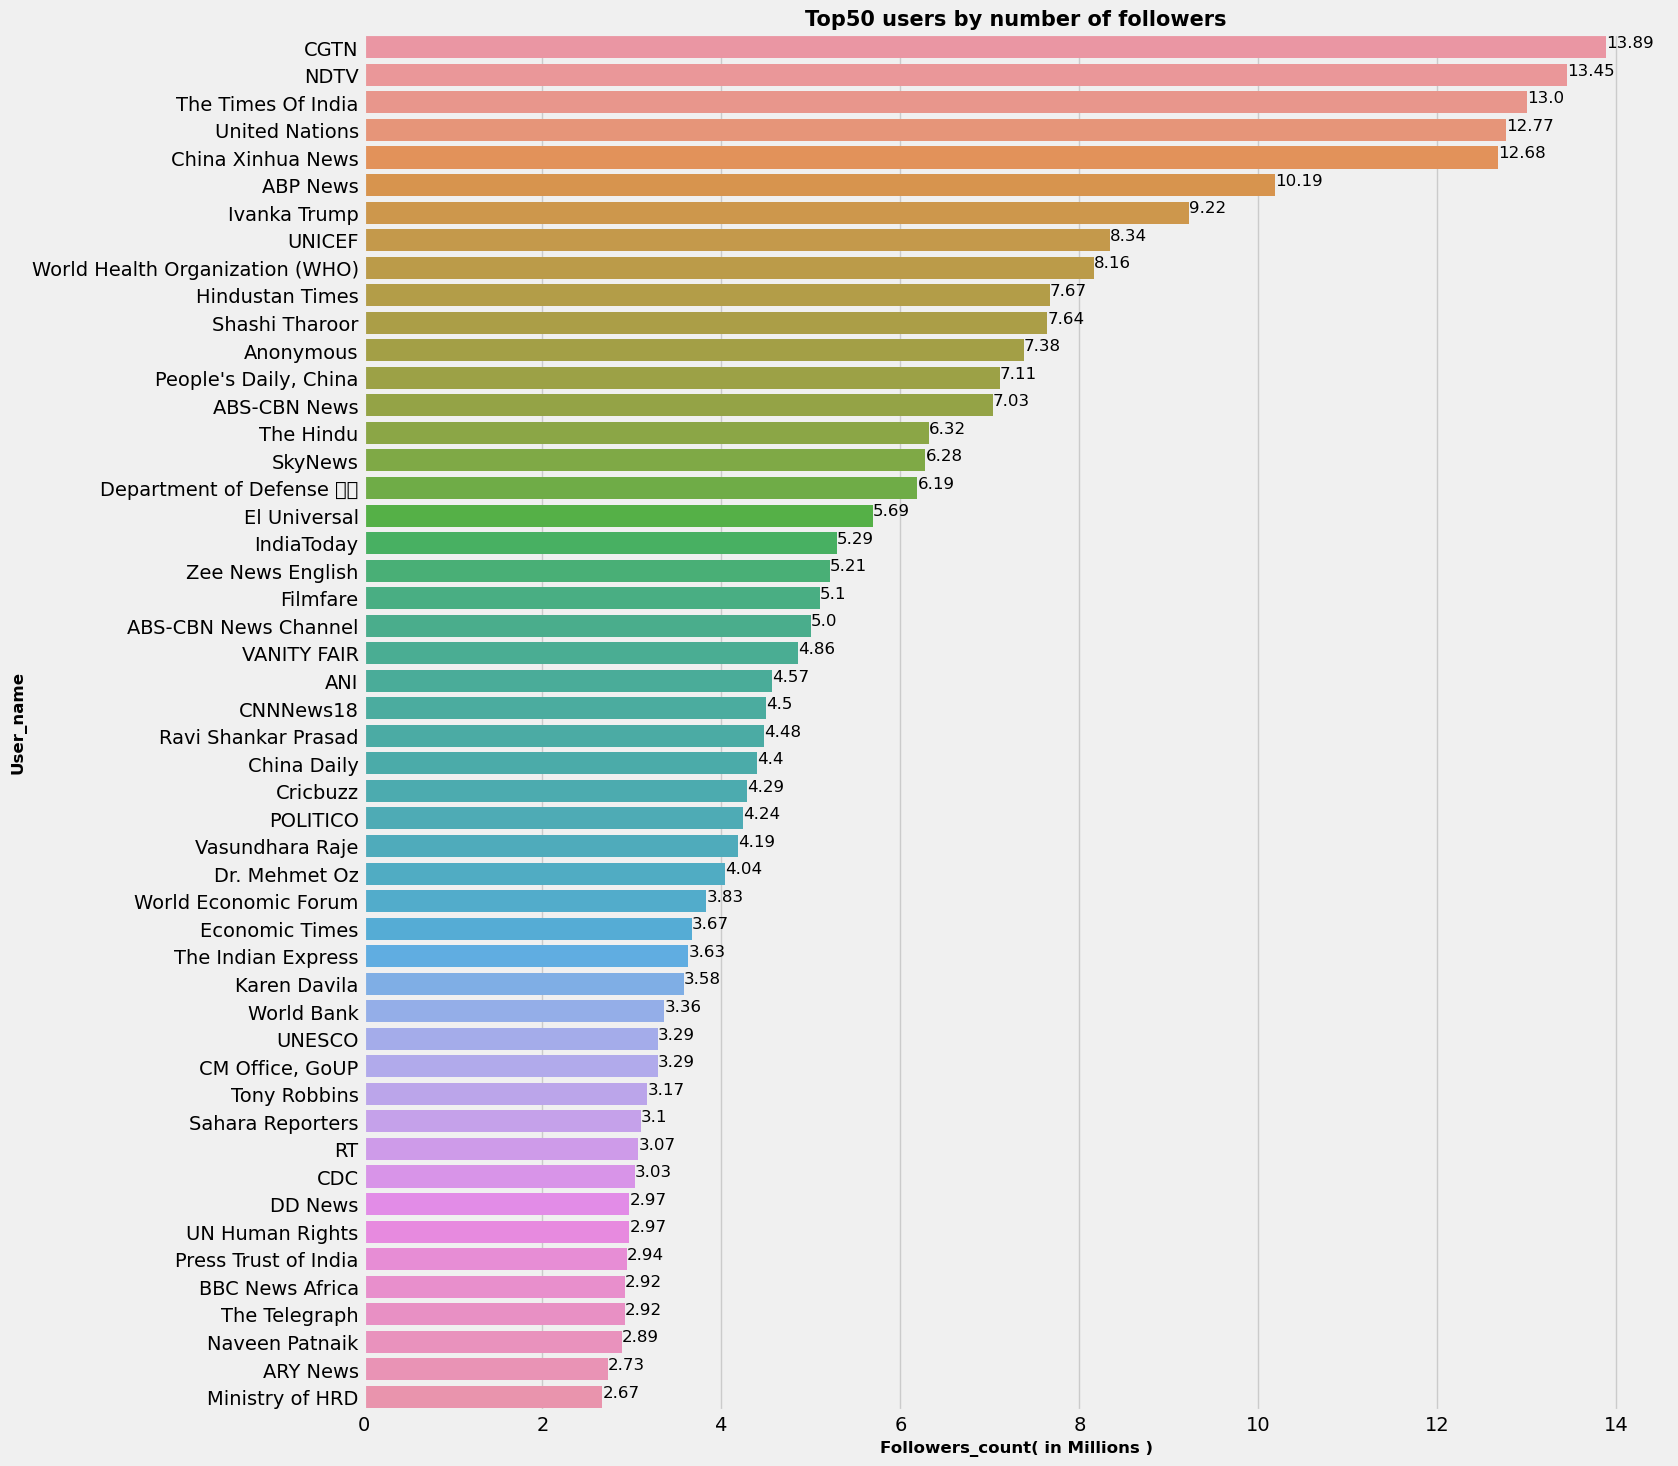

In [42]:
data = dataframe.sort_values('user_followers',ascending=False).drop_duplicates(subset='user_name', keep="first")
data = data[['user_name', 'user_followers', 'tweet_count']]
data.sort_values('user_followers',ascending=False)

data1 = data.head(50).reset_index().copy()
for i in range(50):
    data1['user_followers'][i] = millify(data1['user_followers'][i],precision=2)
    
data1['user_followers'] = data1['user_followers'].str[:-1].astype(float) # To remove 'M'

plt.figure(figsize=(15, 17))
sns.barplot(y='user_name',x='user_followers',data=data1.head(50))
y=data1['user_followers'].head(50)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top50 users by number of followers',weight='bold', size=15)
plt.ylabel('User_name', size=12, weight='bold')
plt.xlabel('Followers_count( in Millions )', size=12, weight='bold')
plt.show()

<Axes: >

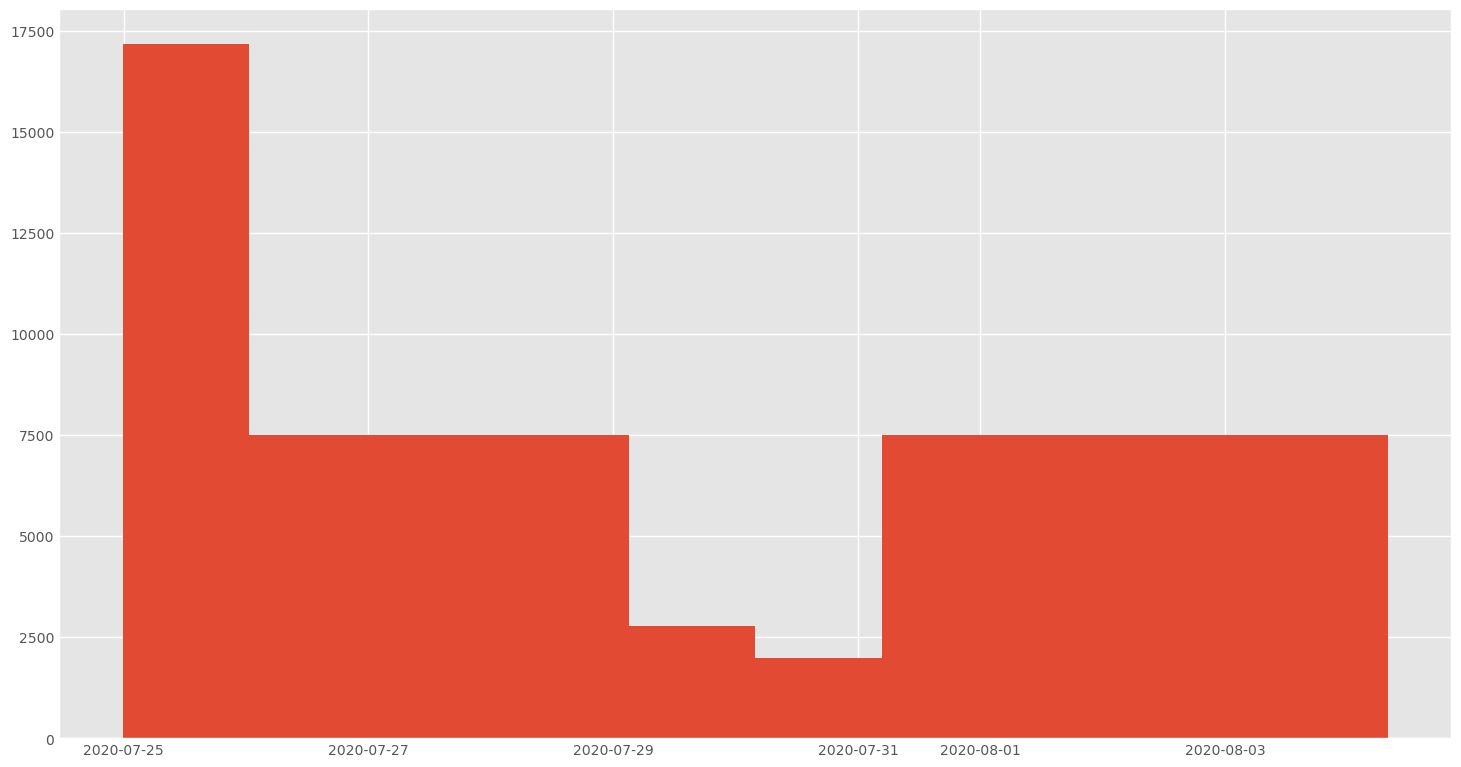

In [57]:
dataframe['date'].hist()

array([[<Axes: title={'center': 'user_followers'}>,
        <Axes: title={'center': 'user_friends'}>],
       [<Axes: title={'center': 'user_favourites'}>,
        <Axes: title={'center': 'date'}>],
       [<Axes: title={'center': 'tweet_count'}>, <Axes: >]], dtype=object)

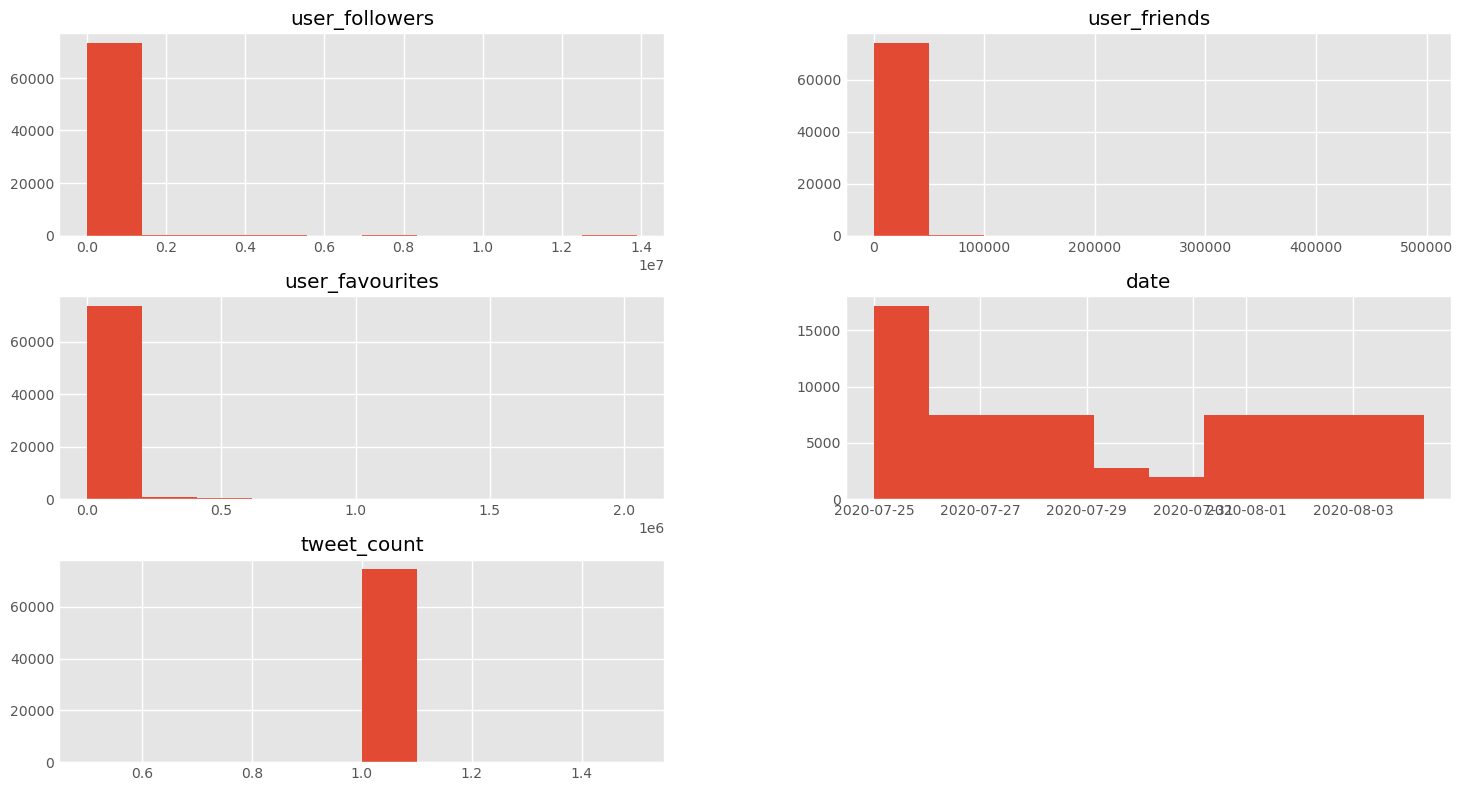

In [56]:
dataframe.hist()

In [77]:
import datetime as dt
def read_as_datetime(str_date):
    # replace %Y-%m-%d with your own date format
    return dt.datetime.strptime(str_date,'%Y-%M-%d')

In [143]:
tweets_mas = dataframe.where(dataframe['date'].dt.day==25)
df2 = pd.DataFrame(tweets_mas)
df2

C:\Users\ZERO3\anaconda3\envs\ArteDeLaAnalitica\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

C:\Users\ZERO3\anaconda3\envs\ArteDeLaAnalitica\lib\site-packages\IPython\core\formatters.py:342: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweet_count
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,1.0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,1.0
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,1.0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,1.0
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
74432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
74433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
74434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'user_followers'}>,
        <Axes: title={'center': 'user_friends'}>],
       [<Axes: title={'center': 'user_favourites'}>,
        <Axes: title={'center': 'date'}>],
       [<Axes: title={'center': 'tweet_count'}>, <Axes: >]], dtype=object)

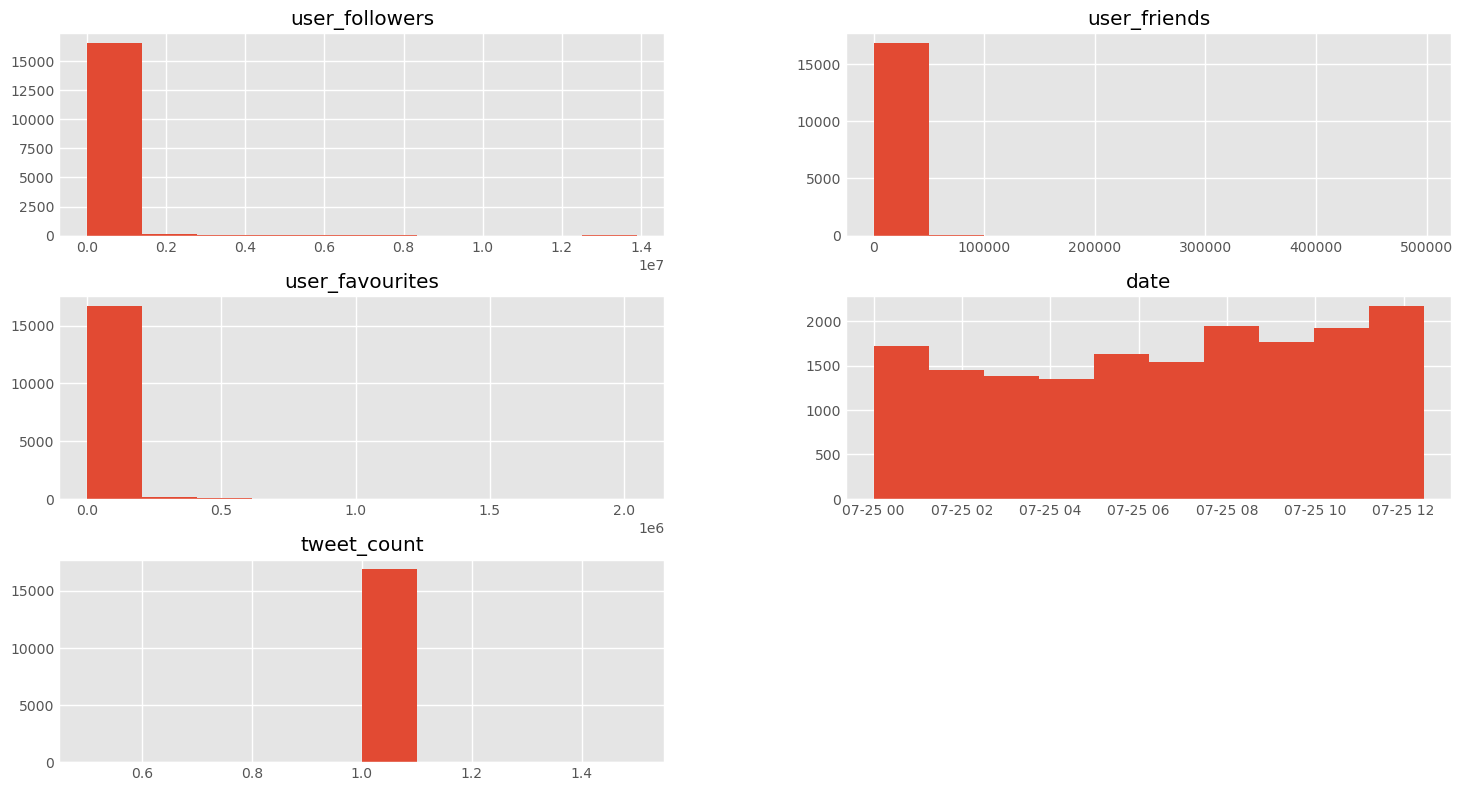

In [144]:
df2.hist()

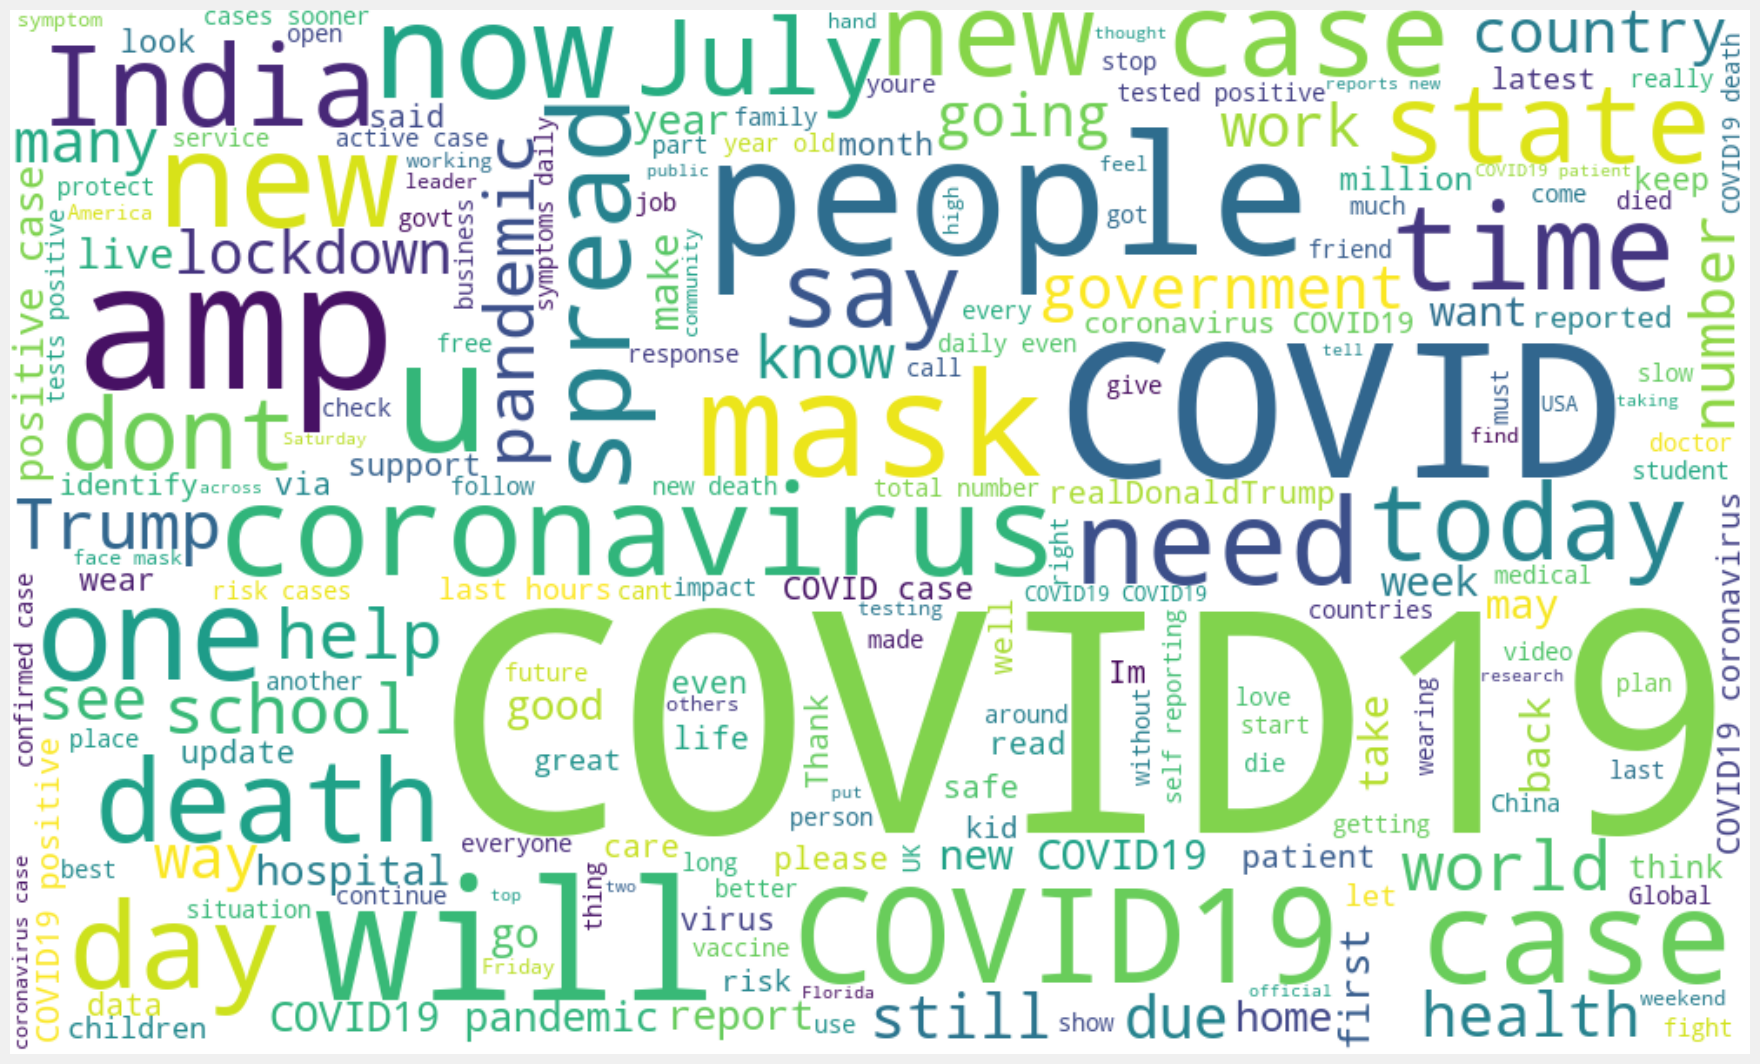

In [145]:
df2['text'] = df2['text'].apply(text_cleaner)
wordClouder(df2['text'], "tweets.png")

### Conclusión

Con base en el análisis realizado, se puede observar que los medios juegan un papel importante, ya que el contenido de estos influyen en la manera en la que pensamos. En este análisis se mostró la diferencia entre las palabras más comunes entre todos los datos y los del día con más tweets. 

### ¿Es posible incluir el uso del algoritmo Kmeans para apoyar con la descripción de los datos?

En este caso en específico el uso de un algoritmo de Kmeans no es necesario, ya que lo que se prentende es analizar cómo los medios del día con más tweets afectaron la manera en la que las personas se estaban expresando en redes sociales. Sin embargo, el uso de k means puede ser útil para determinar los sentimientos de los mensajes y así categorizarlos y agruparlos. Por otra parte, otra implementación en la que sería útil sería para clasificar aspectos de personalidad de los usuarios. 

### Herramientas vistas durante el curso

#### Visualización de datos

Se empleo el uso de gráficas, como el histograma y las gráficas de barras, para visualizar y ver la distribución de los datos, y así saber los métodos de manipulación de datos necesarios para obtener los resultados esperados. 

#### Visualización de palabras más comunes

Se empleo la herramienta de wordcloud para observar de manera gráfica la repetición de palabras.

#### Carga de datos con Python/Pandas
